<a href="https://colab.research.google.com/github/NckolasGomes6696/IPet/blob/main/Controle_Fuzzy_para_N%C3%ADvel_de_L%C3%ADquidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
## INSTALAÇÃO DA BIBLIOTECA SCIKIT ##

!pip install -U scikit-fuzzy

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl



In [51]:
## Variáveis de entrada e saída ##
variavel_erro = ctrl.Antecedent(np.arange(-10, 11, 1), 'erro')
variavel_altura = ctrl.Antecedent(np.arange(0, 31, 1), 'altura')
variavel_vazao = ctrl.Consequent(np.arange(0, 101, 1), 'vazao')

In [52]:
## Funções de pertinência ##
variavel_erro['negativo'] = fuzz.trimf(variavel_erro.universe, [-10, -5, 0])
variavel_erro['neutro'] = fuzz.trimf(variavel_erro.universe, [-5, 0, 5])
variavel_erro['positivo'] = fuzz.trimf(variavel_erro.universe, [0, 5, 10])

variavel_altura['baixa'] = fuzz.trimf(variavel_altura.universe, [0, 5, 10])
variavel_altura['pequena'] = fuzz.trimf(variavel_altura.universe, [5, 10, 15])
variavel_altura['media'] = fuzz.trimf(variavel_altura.universe, [10, 20, 30])
variavel_altura['alta'] = fuzz.trimf(variavel_altura.universe, [20, 25, 30])
variavel_altura['muito_alta'] = fuzz.trimf(variavel_altura.universe, [25, 30, 35])

variavel_vazao['muito_baixa'] = fuzz.trimf(variavel_vazao.universe, [0, 10, 20])
variavel_vazao['baixa'] = fuzz.trimf(variavel_vazao.universe, [10, 20, 40])
variavel_vazao['media'] = fuzz.trimf(variavel_vazao.universe, [30, 50, 70])
variavel_vazao['alta'] = fuzz.trimf(variavel_vazao.universe, [60, 80, 100])
variavel_vazao['muito_alta'] = fuzz.trimf(variavel_vazao.universe, [80, 100, 100])


In [53]:
## Regras ##
regra_1 = ctrl.Rule(variavel_erro['negativo'], variavel_vazao['muito_baixa'])
regra_2 = ctrl.Rule(variavel_erro['positivo'], variavel_vazao['muito_alta'])
regra_3 = ctrl.Rule(variavel_erro['neutro'] & variavel_altura['baixa'], variavel_vazao['muito_baixa'])
regra_4 = ctrl.Rule(variavel_erro['neutro'] & variavel_altura['pequena'], variavel_vazao['baixa'])
regra_5 = ctrl.Rule(variavel_erro['neutro'] & variavel_altura['media'], variavel_vazao['media'])
regra_6 = ctrl.Rule(variavel_erro['neutro'] & variavel_altura['alta'], variavel_vazao['alta'])
regra_7 = ctrl.Rule(variavel_erro['neutro'] & variavel_altura['muito_alta'], variavel_vazao['muito_alta'])


In [54]:
## Controle ##
sistema_de_controle = ctrl.ControlSystem([regra_1, regra_2, regra_3, regra_4, regra_5, regra_6, regra_7])


In [55]:
## Simulador do sistema de controle ##
simulador = ctrl.ControlSystemSimulation(sistema_de_controle)

In [56]:
## Simulação com os valores de entrada
simulador.input['erro'] = -3
simulador.input['altura'] = 12

In [57]:
## Computar resultado
simulador.compute()

In [58]:
## Demonstrar Resultado
print("Vazão da bomba:", simulador.output['vazao'])

Vazão da bomba: 27.64814814814817


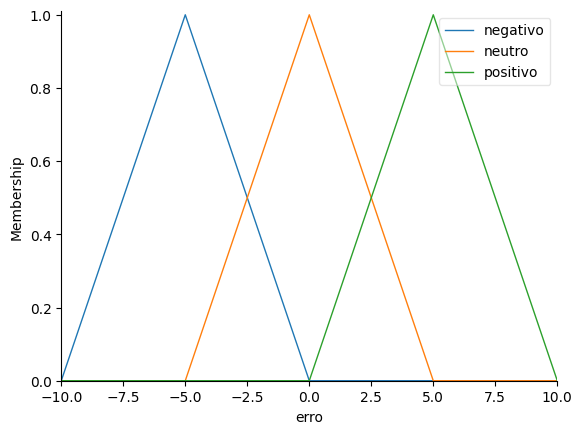

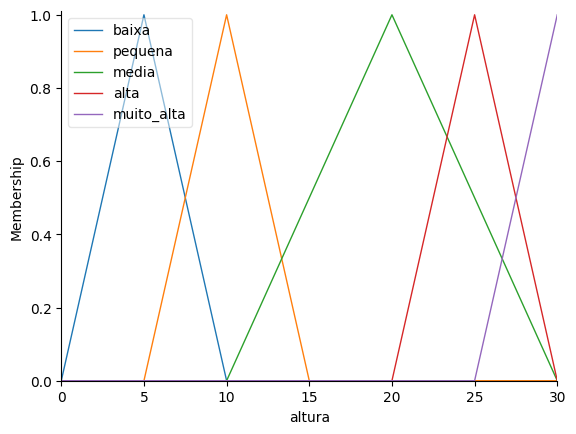

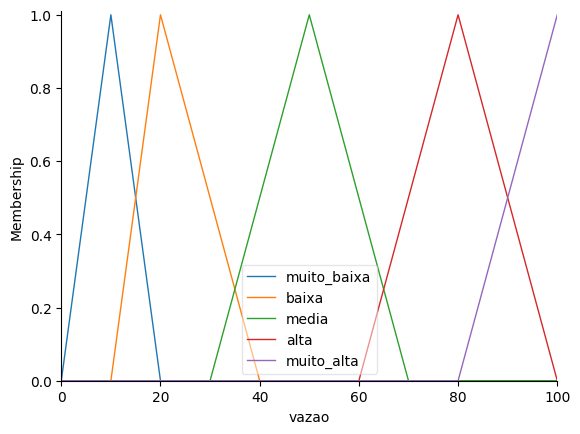

In [60]:
## Plot para visualizar saídas
variavel_erro.view()
variavel_altura.view()
variavel_vazao.view()
plt.show()